# Text Preprocessing


## Case Folding

In [1]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [6]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
text = "Python programming is very popular among developers."

In [8]:
text_lower = text.lower()
print("Case Folding:", text_lower)

Case Folding: python programming is very popular among developers.


## Tokenization

In [9]:
tokens_nltk = word_tokenize(text)
print("Tokenization (NLTK):", tokens_nltk)

Tokenization (NLTK): ['Python', 'programming', 'is', 'very', 'popular', 'among', 'developers', '.']


In [10]:
doc = nlp(text)
tokens_spacy = [token.text for token in doc]
print("Tokenization (SpaCy):", tokens_spacy)

Tokenization (SpaCy): ['Python', 'programming', 'is', 'very', 'popular', 'among', 'developers', '.']


## Stemming

In [11]:
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in tokens_nltk]
print("Stemming:", stems)

Stemming: ['python', 'program', 'is', 'veri', 'popular', 'among', 'develop', '.']


## Lemmatization

In [12]:
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word, pos="v") for word in tokens_nltk]
print("Lemmatization:", lemmas)

Lemmatization: ['Python', 'program', 'be', 'very', 'popular', 'among', 'developers', '.']


## Remove Stopword

In [13]:
stop_words = set(stopwords.words("english"))
tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
print("Stopword Removal:", tokens_filtered)

Stopword Removal: ['Python', 'programming', 'popular', 'among', 'developers', '.']


## Word Cloud

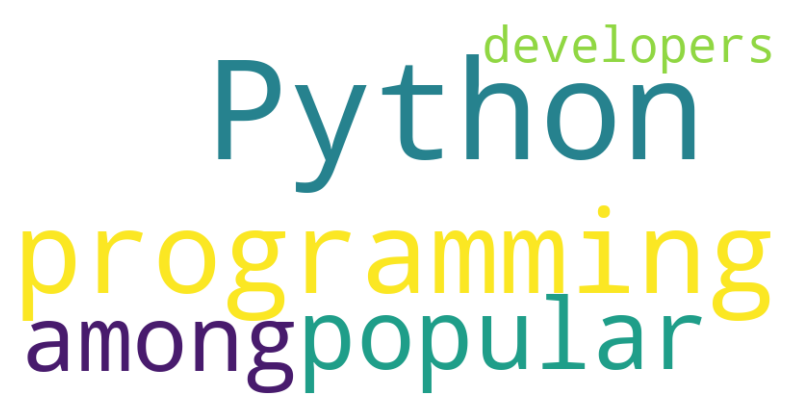

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
df = pd.read_csv("Datasets/tutorial.csv")
df

,review,class
0,Fantastic spot for an even or a quite cocktail...,1
1,"Love, love, love the calamari. It's so good an...",1
2,"Love this place. Stiff martinis and cocktails,...",1
3,It's everything a great cocktail bar should be...,1
4,"I came here before a pirates game, so it was a...",1
...,...,...
4316,My wife and I caught this show at the Golden N...,0
4317,This was the dumbest show we have ever seen. ...,0
4318,My girlfriend and I went to this show. It was ...,0
4319,The restrooms looked like after an bombardment...,0
